In [1]:
import matplotlib.pyplot as plt

#2018년 지역별 인구증가율
population_inc = [
    0.3, 
    -0.78,
    1.26,
    0.03,
    1.11,
    15.17,
    0.24,
    -0.24,
    -0.47,
    -0.77,
    -0.37,
    -0.85,
    -0.41,
    -0.27,
    0.02,
    -0.76,
    2.66
]

#2018년 지역별 고령인구비율
population_old = [
    12.27,
    14.44,
    11.87,
    18.75,
    17.52,
    9.29,
    16.37,
    19.78,
    19.51,
    12.65,
    14.74,
    10.72,
    21.94,
    12.83,
    15.51,
    17.14,
    14.42
]

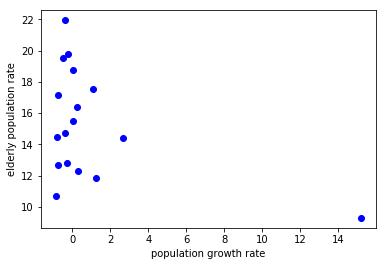

In [2]:
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('population growth rate')
plt.ylabel('elderly population rate')
plt.show()

In [3]:
# 극단치(outlier) 제거
outlier = population_inc.index(15.17)
print(outlier)

print(population_inc.pop(outlier))
print(population_old.pop(outlier))

print('\nAfter removing the outlier\n')
print(population_inc)
print(population_old)

5
15.17
9.29
[After removing the outlier]
[0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
[12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = population_inc
Y = population_old

In [25]:
# ex4.4 텐서플로를 이용해 회귀선 구하기

a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차 제곱의 평균 반환
def compute_loss():
    y_pred = a*X + b
    loss = tf.reduce_mean((Y - y_pred)**2)
    return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차 제곱의 평균을 최소화
    optimizer.minimize(compute_loss, var_list =[a,b])
    if i%100==99:
        print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x + b

99 a:  0.1007301 b:  7.089539 loss:  83.22264
199 a:  -0.13317242 b:  11.501236 loss:  27.113413
299 a:  -0.26673347 b:  14.00115 loss:  12.557133
399 a:  -0.32687527 b:  15.127129 loss:  10.074091
499 a:  -0.34822807 b:  15.526916 loss:  9.801035
599 a:  -0.35422778 b:  15.639244 loss:  9.781707
699 a:  -0.3555636 b:  15.664256 loss:  9.780828
799 a:  -0.35579833 b:  15.66865 loss:  9.780804
899 a:  -0.35583046 b:  15.66925 loss:  9.780804
999 a:  -0.35583326 b:  15.669303 loss:  9.780805


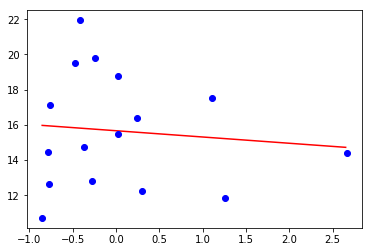

In [11]:
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.show()

In [29]:
# ex4.5 텐서플로를 이용해 2차 함수 회귀선 구하기

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균 반환
def compute_loss():
    y_pred = (a*X)**5 + b * X + c
    loss = tf.reduce_mean((Y - y_pred)**2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    if i%100 == 99:
        print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'c: ', c.numpy(), 'loss: ', compute_loss().numpy())

99 a:  0.6638021 b:  -3.286913 c:  6.390078 loss:  86.99419
199 a:  0.6002807 b:  -2.4495888 c:  10.805354 loss:  31.268045
299 a:  0.5037208 b:  -1.2236252 c:  13.509549 loss:  14.108143
399 a:  0.40193373 b:  -0.63185734 c:  14.876405 loss:  10.3983965
499 a:  0.31323776 b:  -0.43252861 c:  15.4314575 loss:  9.847797
599 a:  0.25527525 b:  -0.3838823 c:  15.609278 loss:  9.789984
699 a:  0.22024497 b:  -0.3697787 c:  15.654888 loss:  9.783882
799 a:  0.1972432 b:  -0.36400378 c:  15.665 loss:  9.78249
899 a:  0.18061957 b:  -0.3611041 c:  15.667348 loss:  9.781877
999 a:  0.1677349 b:  -0.35946652 c:  15.668116 loss:  9.781541


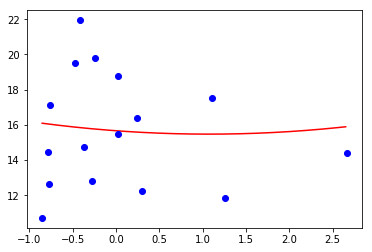

In [30]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x*line_x + b*line_x + c

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')

plt.show()

In [33]:
# ex4.6 텐서플로를 이용해 3차함수 회귀선 구하기

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차 제곱의 평균
def compute_loss():
    y_pred = (a*X)**3 + (b*X)**2 + c*X + d
    loss = tf.reduce_mean((Y-y_pred)**2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    if i%100 == 99:
        print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'c: ', c.numpy(), 'd: ', d.numpy(), 'loss: ', compute_loss().numpy())
        

99 a:  -1.8380818 b:  4.499777 c:  -4.5252504 d:  0.03916151 loss:  134.24046
199 a:  -1.8011628 b:  4.3707767 c:  -3.8451138 d:  0.03916151 loss:  133.53317
299 a:  -1.8072231 b:  4.3779116 c:  -3.6161184 d:  0.03916151 loss:  133.51318
399 a:  -1.809251 b:  4.3793373 c:  -3.5755987 d:  0.03916151 loss:  133.51433
499 a:  -1.808566 b:  4.3796015 c:  -3.5673363 d:  0.03916151 loss:  133.51251
599 a:  -1.7993168 b:  4.3823605 c:  -3.5660992 d:  0.03916151 loss:  133.7367
699 a:  -1.8085198 b:  4.3796577 c:  -3.5671046 d:  0.03916151 loss:  133.51254
799 a:  -1.8086022 b:  4.3796253 c:  -3.5666049 d:  0.03916151 loss:  133.51251
899 a:  -1.8082889 b:  4.3796268 c:  -3.567755 d:  0.03916151 loss:  133.5127
999 a:  -1.8085893 b:  4.379633 c:  -3.5665958 d:  0.03916151 loss:  133.51251


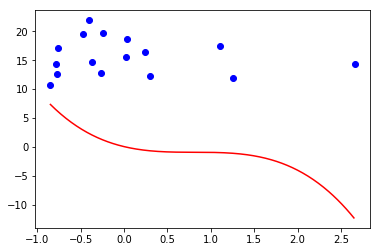

In [35]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a*line_x*line_x*line_x + b*line_x*line_x + c*line_x + d

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.show()

In [38]:
# ex4.7 딥러닝 네트워크를 이용한 회귀

import tensorflow as tf
import numpy as np

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X, Y, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 10ms/sample - loss: 254.6866
Epoch 2/10
16/16 [==============================] - 0s 57us/sample - loss: 105.2014
Epoch 3/10
16/16 [==============================] - 0s 50us/sample - loss: 11.2979
Epoch 4/10
16/16 [==============================] - 0s 47us/sample - loss: 10.1026
Epoch 5/10
16/16 [==============================] - 0s 55us/sample - loss: 9.6842
Epoch 6/10
16/16 [==============================] - 0s 52us/sample - loss: 9.5605
Epoch 7/10
16/16 [==============================] - 0s 55us/sample - loss: 9.4955
Epoch 8/10
16/16 [==============================] - 0s 47us/sample - loss: 9.4443
Epoch 9/10
16/16 [==============================] - 0s 54us/sample - loss: 9.3940
Epoch 10/10
16/16 [==============================] - 0s 50us/sample - loss: 9.3402


In [40]:
model.predict(X)

array([[15.979496],
       [15.483827],
       [15.387023],
       [16.00394 ],
       [15.524964],
       [15.991274],
       [15.944573],
       [15.811312],
       [15.497277],
       [15.87971 ],
       [15.384201],
       [15.854371],
       [15.931888],
       [16.003355],
       [15.510531],
       [13.699848]], dtype=float32)

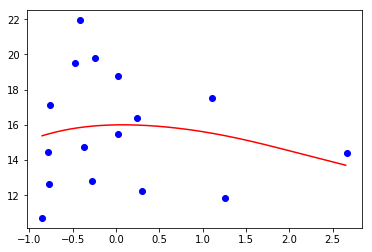

In [41]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.show()

In [66]:
# 보스턴 주택 가격 데이터세트의 13가지 데이터로 주택 가격 예측하기
# ex4.11 데이터

from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [67]:
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [68]:
# 데이터 정규화

def standard(data):
    mean = data.mean()
    std = data.std()
    return (data - mean)/std

train_X = standard(train_X)
train_Y = standard(train_Y)
test_X = standard(test_X)
test_Y = standard(test_Y)

In [75]:
test_X[0]

array([-0.35847528, -0.4805563 , -0.35837132, -0.4805563 , -0.47597267,
       -0.43712325,  0.19449881, -0.46817106, -0.31854307,  4.01531071,
       -0.34419516, -0.29660378, -0.28445279])

In [70]:
# ex4.13 회귀 모델 생성

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_19 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_20 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [71]:
# ex4.14 회귀 모델 학습

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 544us/sample - loss: 1.5829 - val_loss: 1.2392
Epoch 2/25
303/303 [==============================] - 0s 44us/sample - loss: 0.9698 - val_loss: 1.2977
Epoch 3/25
303/303 [==============================] - 0s 49us/sample - loss: 0.9057 - val_loss: 1.2567
Epoch 4/25
303/303 [==============================] - 0s 49us/sample - loss: 0.7946 - val_loss: 1.1583
Epoch 5/25
303/303 [==============================] - 0s 47us/sample - loss: 0.7343 - val_loss: 1.0371
Epoch 6/25
303/303 [==============================] - 0s 48us/sample - loss: 0.7195 - val_loss: 1.0312
Epoch 7/25
303/303 [==============================] - 0s 43us/sample - loss: 0.7054 - val_loss: 1.1856
Epoch 8/25
303/303 [==============================] - 0s 55us/sample - loss: 0.7479 - val_loss: 1.0762
Epoch 9/25
303/303 [==============================] - 0s 67us/sample - loss: 0.6644 - val_loss: 1.1186
Epoch 10/25
303/303 [=====

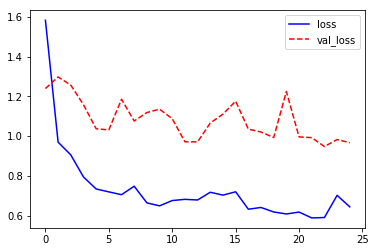

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.legend()
plt.show()

In [73]:
# 4.16 회귀 모델 평가

model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 32us/sample - loss: 0.6613


0.6612861296709847

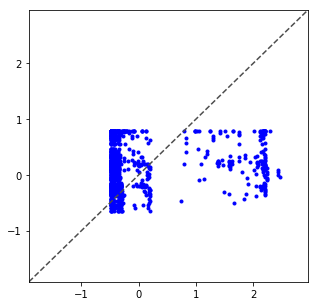

In [74]:
# 실제 주택가격과 예측 주택가격의 시각화

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_X, pred_Y, 'b.')
#plt.axis([x_start, x_end, y_start, y_end])
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.show()

In [76]:
# 4.18 모델 재정의, 학습

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)    
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 561us/sample - loss: 3.8726 - val_loss: 1.2056
Epoch 2/25
303/303 [==============================] - 0s 42us/sample - loss: 0.8015 - val_loss: 1.0324
Epoch 3/25
303/303 [==============================] - 0s 40us/sample - loss: 0.6685 - val_loss: 1.0519
Epoch 4/25
303/303 [==============================] - 0s 40us/sample - loss: 0.6906 - val_loss: 1.0723
Epoch 5/25
303/303 [==============================] - 0s 48us/sample - loss: 0.7057 - val_loss: 1.0395


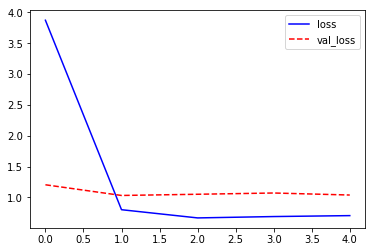

In [77]:
# 4.19 학습 결과 시각화

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.legend()
plt.show()

In [78]:
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 31us/sample - loss: 0.7191


0.7190758457370833

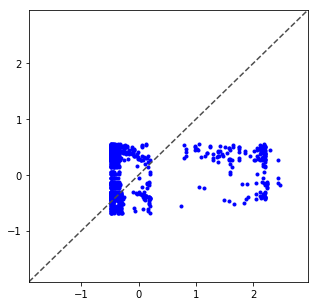

In [79]:
pred_Y = model.predict(test_X)
plt.figure(figsize=(5,5))
plt.plot(test_X, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.show()